<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/Tarefa_1_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [42]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url,
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [43]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [44]:
# Substituir os valores da coluna 'sex' por labels compreensíveis
df['sex'] = df['sex'].map({0: 'Female', 1: 'Male'})

# Criar a tabela bivariada
bivariada = df.groupby('sex')['flag_doente'].agg(['sum', 'count'])
bivariada.columns = ['Número de doentes', 'Total']
bivariada['Número de saudáveis'] = bivariada['Total'] - bivariada['Número de doentes']
bivariada['Quantidade média de doentes'] = bivariada['Número de doentes'] / bivariada['Total']
bivariada['Odds'] = bivariada['Número de doentes'] / bivariada['Número de saudáveis']

# Reordenar colunas
bivariada = bivariada[['Número de doentes', 'Número de saudáveis', 'Total', 'Quantidade média de doentes', 'Odds']]

# Calcular o Odds Ratio com o total como referência
total_odds = df['flag_doente'].sum() / (df.shape[0] - df['flag_doente'].sum())
bivariada['Odds Ratio'] = bivariada['Odds'] / total_odds

# Calcular Logito (LOG(Odds))
bivariada['Logito'] = np.log(bivariada['Odds'])

# Calcular Weight of Evidence (WOE)
bivariada['WOE'] = np.log(bivariada['Odds Ratio'])

# Exibir a tabela resultante
from google.colab import data_table
data_table.DataTable(bivariada)

,Número de doentes,Número de saudáveis,Total,Quantidade média de doentes,Odds,Odds Ratio,Logito,WOE
sex,,,,,,,,
Female,25,72,97,0.257732,0.347222,0.409672,-1.05779,-0.892398
Male,114,92,206,0.553398,1.239130,1.461996,0.21441,0.379802


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [46]:
# Criar categorias para a variável 'age' em 5 grupos de faixas etárias
df['age_group'] = pd.qcut(df['age'], q=5, labels=["Grupo 1", "Grupo 2", "Grupo 3", "Grupo 4", "Grupo 5"])

# Criar a tabela bivariada para a variável 'age_group'
bivariada_age = df.groupby('age_group', observed=True).agg(
    Número_de_doentes=('flag_doente', 'sum'),
    Total=('flag_doente', 'count'),
    Média_idade=('age', 'mean')
)

# Calcular o número de saudáveis
bivariada_age['Número_de_saudáveis'] = bivariada_age['Total'] - bivariada_age['Número_de_doentes']

# Calcular as demais estatísticas
bivariada_age['Quantidade média de doentes'] = bivariada_age['Número_de_doentes'] / bivariada_age['Total']
bivariada_age['Odds'] = bivariada_age['Número_de_doentes'] / bivariada_age['Número_de_saudáveis']

# Calcular o Odds Ratio com o total como referência
total_odds_age = df['flag_doente'].sum() / (df.shape[0] - df['flag_doente'].sum())
bivariada_age['Odds Ratio'] = bivariada_age['Odds'] / total_odds_age

# Calcular Logito (LOG(Odds))
bivariada_age['Logito'] = np.log(bivariada_age['Odds'])

# Calcular Weight of Evidence (WOE)
bivariada_age['WOE'] = np.log(bivariada_age['Odds Ratio'])

# Reordenar colunas
bivariada_age = bivariada_age[['Número_de_doentes', 'Número_de_saudáveis', 'Total', 'Média_idade', 'Quantidade média de doentes', 'Odds', 'Odds Ratio', 'Logito', 'WOE']]

# Arredondar valores para melhor visualização
bivariada_age = bivariada_age.round(4)

# Exibir a tabela bivariada para 'age_group'
from google.colab import data_table
data_table.DataTable(bivariada_age)

,Número_de_doentes,Número_de_saudáveis,Total,Média_idade,Quantidade média de doentes,Odds,Odds Ratio,Logito,WOE
age_group,,,,,,,,,
Grupo 1,16,47,63,41.2222,0.2540,0.3404,0.4017,-1.0776,-0.9122
Grupo 2,22,42,64,50.0000,0.3438,0.5238,0.6180,-0.6466,-0.4812
Grupo 3,39,32,71,56.2113,0.5493,1.2188,1.4379,0.1978,0.3632
Grupo 4,32,13,45,60.3556,0.7111,2.4615,2.9043,0.9008,1.0662
Grupo 5,30,30,60,66.5167,0.5000,1.0000,1.1799,0.0000,0.1654


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

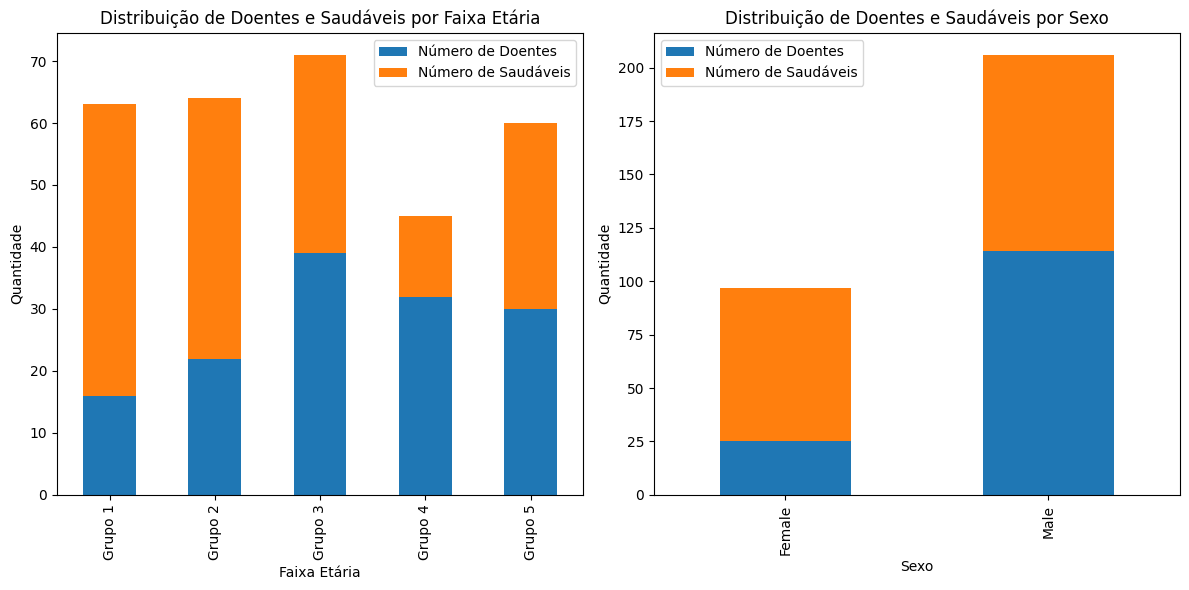

In [47]:
# Criar múltiplos gráficos para visualizar diferentes estatísticas
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Distribuição de Doentes e Saudáveis por Faixa Etária
bivariada_age[['Número_de_doentes', 'Número_de_saudáveis']].plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("Distribuição de Doentes e Saudáveis por Faixa Etária")
axes[0].set_xlabel("Faixa Etária")
axes[0].set_ylabel("Quantidade")
axes[0].legend(["Número de Doentes", "Número de Saudáveis"])

# Gráfico 2: Distribuição de Doentes e Saudáveis por Sexo
bivariada[['Número de doentes', 'Número de saudáveis']].plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title("Distribuição de Doentes e Saudáveis por Sexo")
axes[1].set_xlabel("Sexo")
axes[1].set_ylabel("Quantidade")
axes[1].legend(["Número de Doentes", "Número de Saudáveis"])

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()